<a href="https://colab.research.google.com/github/Helda05/Predicting-Sale-Prices/blob/main/Predicting_Sale_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting sales prices**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Predict_sales_price/train.csv', index_col = 'Id') #setting "Id" as index col
test_data = pd.read_csv('/content/drive/MyDrive/Predict_sales_price/test.csv', index_col = 'Id')
train = train_data.copy()

# **Exploring data**

In [ ]:
print("Shape of train_data: ",train.shape)
print("Shape of train_data: ",test_data.shape)


Shape of train_data:  (1460, 80)
Shape of train_data:  (1459, 79)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:

#Select cols of numerical and categorical features
numerical_data = train.select_dtypes(include = [int, float]).columns #selecting indices of cols of numerical values
categorical_data = train.select_dtypes(include = [object]).columns

#using simple imputer to impute nan of numerical features with mean
num_imputer = SimpleImputer(strategy="mean")
train[numerical_data] = num_imputer.fit_transform(train[numerical_data])

cat_imputer = SimpleImputer(strategy = "most_frequent")
train[categorical_data] = cat_imputer.fit_transform(train[categorical_data])



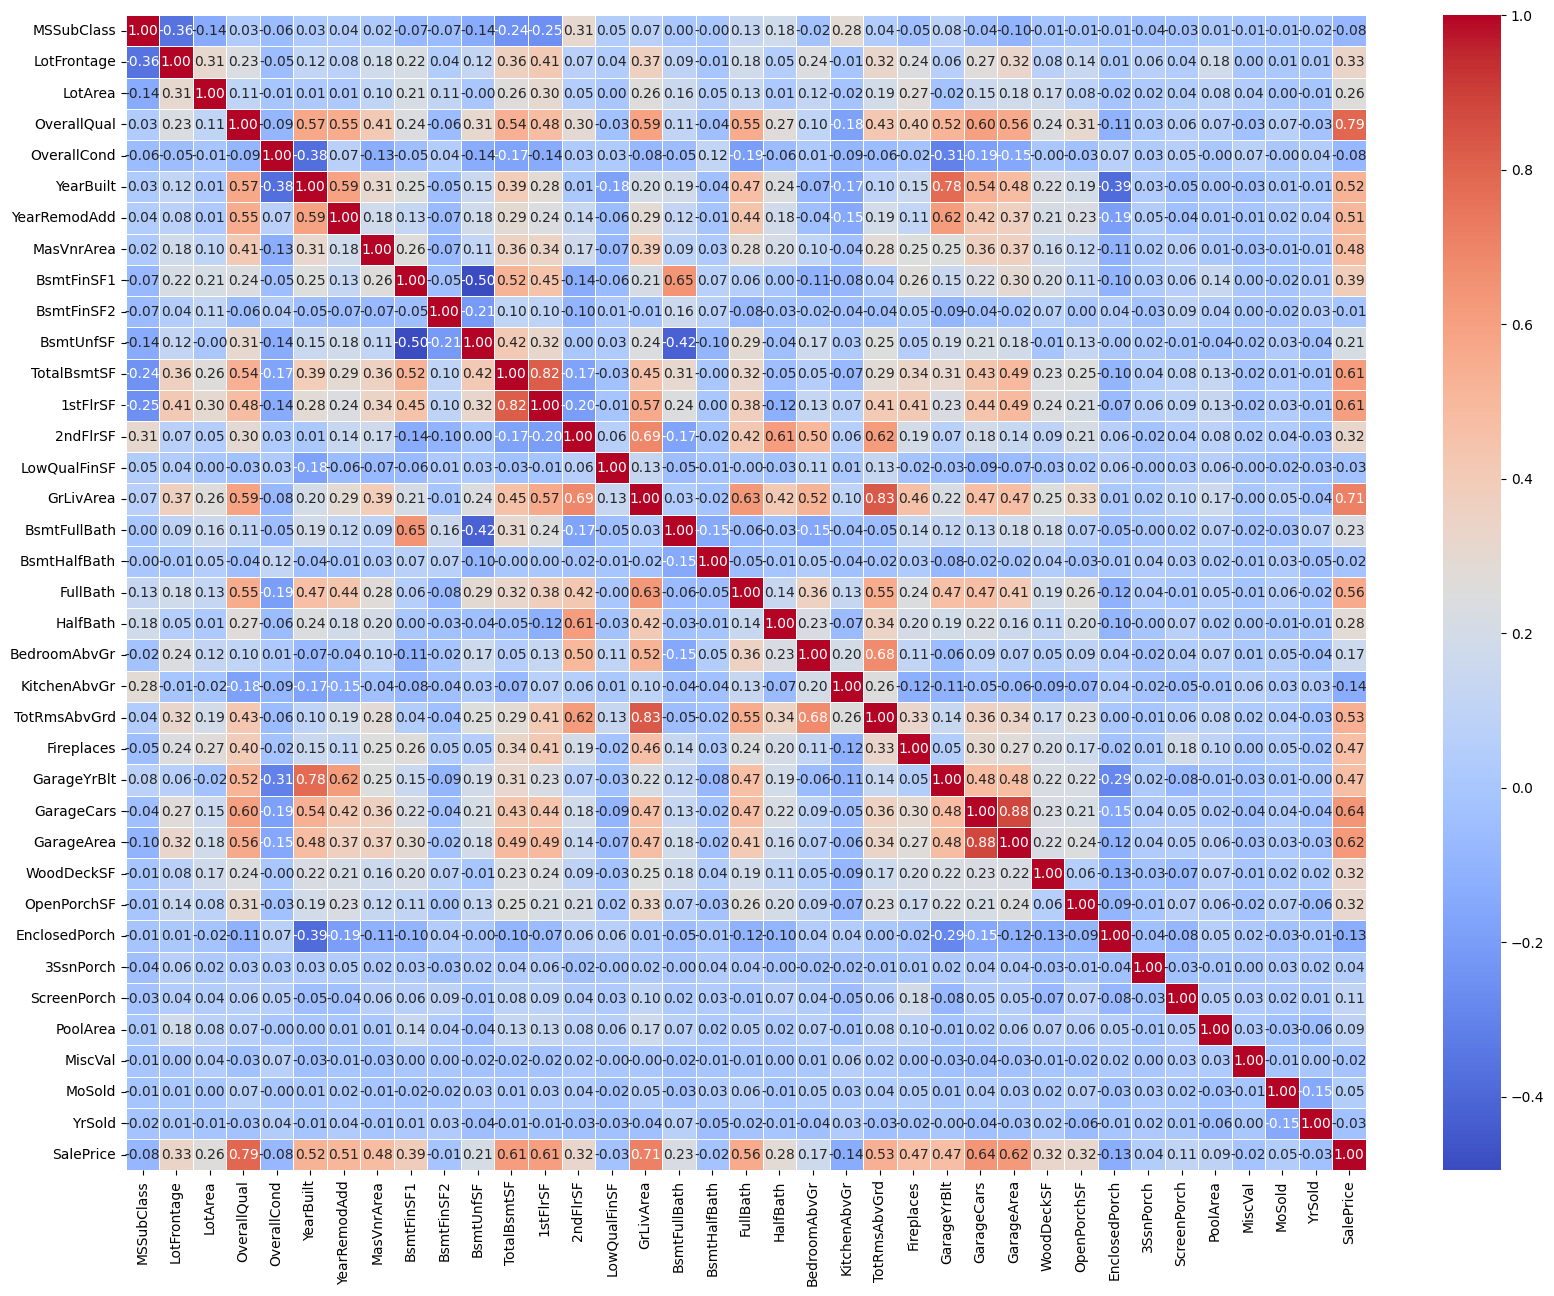

In [ ]:
corr = train[numerical_data].corr()

#plot heatmap to visualise correlation
plt.figure(figsize = (20,15))
sns.heatmap(corr, cmap = "coolwarm", annot = True, fmt = ".2f", linewidths =0.5)
plt.show()

**Plotting barplots of correlation with respect to target (SalePrice)**

In [ ]:
corr_w_target = corr["SalePrice"].sort_values(ascending=False)
# plt.figure(figsize=(10, 8))
# sns.barplot(x=corr_w_target.values, y=corr_w_target.index, palette='viridis')

# # Set labels and title
# plt.xlabel('Correlation Coefficient')
# plt.title('Correlation with SalePrice')

# # Show the plot
# plt.show()
impt = corr_w_target[corr_w_target.values>0.1]
impt_features = impt.index
print("imptortant features: ")
pd.DataFrame(impt)


imptortant features: 


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Removing outliers (IQR/ Z-score)

In [ ]:
# from scipy import stats

# for col in numerical_data.columns:
#   z_scores = stats.zscore(numerical_data[col])
#   threshold = 3 # 3 standard deivations
#   outliers = (z_scores > threshold) | (z_scores < -threshold)
#   numerical_data = numerical_data[~outliers]

# print(numerical_data['ScreenPorch'].value_counts())

# Assuming X is your DataFrame
# Iterate through columns


for column in numerical_data:
    # Calculate the IQR for the current column
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1

    # Set a threshold for outliers (e.g., 1.5 times IQR)
    threshold = 1.5
    outliers = (train[column] < (Q1 - threshold * IQR)) | (train[column] > (Q3 + threshold * IQR))

    # Remove outliers from the current column
    train = train[~outliers]

# Display the DataFrame after outlier removal
print(train.shape)



(548, 80)


Normalize numerical features using min-max


In [ ]:
scaler = MinMaxScaler()
train[numerical_data] = scaler.fit_transform(train[numerical_data])
print(train)

      MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
Id                                                                       
1            0.4       RL     0.443038  0.400706   Pave  Grvl      Reg   
3            0.4       RL     0.481013  0.602391   Pave  Grvl      IR1   
5            0.4       RL     0.683544  0.819203   Pave  Grvl      IR1   
7            0.0       RL     0.569620  0.518404   Pave  Grvl      Reg   
11           0.0       RL     0.506329  0.598790   Pave  Grvl      Reg   
...          ...      ...          ...       ...    ...   ...      ...   
1445         0.0       RL     0.417722  0.404307   Pave  Grvl      Reg   
1449         0.3       RL     0.506329  0.639631   Pave  Grvl      Reg   
1452         0.0       RL     0.607595  0.459195   Pave  Grvl      Reg   
1455         0.0       FV     0.405063  0.332277   Pave  Pave      Reg   
1456         0.4       RL     0.405063  0.362314   Pave  Grvl      Reg   

     LandContour Utilities LotConfig 

We can see that there are a few categorical features hence we will convert them to binary


One-hot encoding


In [ ]:
print(train[categorical_data].shape)

(548, 43)


In [ ]:
train_encoded= pd.get_dummies(train[categorical_data],drop_first=True)

In [ ]:
concatenated = pd.concat([train[numerical_data],train_encoded],axis=1) #concat along cols
print(concatenated.shape)

(548, 183)


Id
1       0.586254
3       0.637801
5       0.728866
7       0.924742
11      0.314777
          ...   
1445    0.486942
1449    0.254639
1452    0.856323
1455    0.505498
1456    0.471134
Name: SalePrice, Length: 548, dtype: float64


split data

In [ ]:


X=concatenated.drop("SalePrice", axis=1)
y=concatenated["SalePrice"]
print(y)

Id
1       0.586254
3       0.637801
5       0.728866
7       0.924742
11      0.314777
          ...   
1445    0.486942
1449    0.254639
1452    0.856323
1455    0.505498
1456    0.471134
Name: SalePrice, Length: 548, dtype: float64


# **Linear Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np


# Create a Linear Regression model
#standard scaler in hopes of getting better prediction
linear_regressor = make_pipeline(StandardScaler(), LinearRegression())

# Perform k-fold cross-validation (e.g., with k=5)
cv_scores = cross_val_score(linear_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (as sklearn returns negated values)
mse_scores = -cv_scores

# Print the mean and standard deviation of the MSE scores
print(f'Mean MSE for Linear Regression: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE for Linear Regression: {np.std(mse_scores)}')


Mean MSE for Linear Regression: 1.8801999356363274e+21
Standard Deviation of MSE for Linear Regression: 3.063311221486098e+21


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a RandomForestRegressor
# 100 decision trees
# set random state to ensure reproducibility of randomness
rf_regressor = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=100, random_state=42))

# Perform k-fold cross-validation (e.g., with k=5)
cv_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (as sklearn returns negated values)
mse_scores = -cv_scores

# Print the mean and standard deviation of the MSE scores
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE: {np.std(mse_scores)}')

Mean MSE: 0.004105730862112792
Standard Deviation of MSE: 0.0010067051208862417


# **ADABoost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor



# Create a weak learner (base model), in this case, a decision tree
base_model = DecisionTreeRegressor(max_depth=1)

#using regression tree as base model
base_model2 = RandomForestRegressor(n_estimators=100, random_state=42)


#50 weak learners
ada_regressor1 = make_pipeline(StandardScaler(),AdaBoostRegressor(base_model2,n_estimators=50, random_state=42))
ada_regressor2 = make_pipeline(StandardScaler(),AdaBoostRegressor(base_model2,n_estimators=50, random_state=42))

#k-fold cross validation
cv_scores = cross_val_score(ada_regressor, X, y, cv=5,scoring="neg_mean_squared_error")

mse_scores = -cv_scores

print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'SD of MSE: {np.std(mse_scores)}') #consistency of model



Mean MSE: 0.0035326788419419294
SD of MSE: 0.0004489489848857509


In [ ]:
print(data['MSZoning'].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
